#Integrantes

1.   Bruno Nogueira Burian RM552863
2.   Lucca Augusto Matteoni RM98146
3.   Luccas dos Anjos Correia RN552890




#Importação das Bibliotecas

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#Código da Sprint 2

In [38]:
import pandas as pd

# Função para fazer uma pergunta com opções
def fazer_pergunta_com_opcoes(pergunta, opcoes):
    print(pergunta)
    for i, opcao in enumerate(opcoes):
        print(f"{i+1}. {opcao}")

    while True:
        try:
            escolha = int(input("Digite o número da opção desejada: "))
            if 1 <= escolha <= len(opcoes):
                return escolha
            else:
                print("Opção inválida. Por favor, escolha um número entre 1 e", len(opcoes))
        except ValueError:
            print("Entrada inválida. Por favor, digite um número inteiro.")

# Função para coletar as respostas do usuário
def coletar_respostas_do_usuario():
    respostas = {}

    # Perguntas demográficas
    respostas['idade'] = int(input("Qual a sua idade? "))
    respostas['renda'] = fazer_pergunta_com_opcoes(
        "Qual a sua faixa de renda mensal?",
        ["Menos de R$2.000", "R$2.000 - R$5.000", "R$5.000 - R$10.000", "Mais de R$10.000"]
    )

    # Perguntas sobre hábitos e necessidades
    respostas['frequencia_dentista'] = fazer_pergunta_com_opcoes(
        "Com que frequência você costuma ir ao dentista?",
        ["Nunca", "Raramente", "Algumas vezes ao ano", "Uma vez a cada seis meses", "Mais de uma vez a cada seis meses"]
    )
    respostas['problema_dental'] = input("Você está atualmente com algum problema dental (cáries, dor, etc.)? (Sim/Não): ").upper() == "SIM"
    respostas['interesse_ortodontia'] = input("Você tem interesse em tratamentos ortodônticos (aparelhos)? (Sim/Não): ").upper() == "SIM"
    respostas['interesse_clareamento'] = input("Você tem interesse em clareamento dental? (Sim/Não): ").upper() == "SIM"

    # Perguntas sobre o plano
    respostas['para_familia'] = input("Você está procurando um plano para você mesmo ou para sua família? (Sim/Não): ").upper() == "SIM"
    if respostas['para_familia']:
        respostas['tem_criancas'] = input("Há crianças com menos de 15 anos na família? (Sim/Não): ").upper() == "SIM"
    else:
        respostas['tem_criancas'] = False # Se não é para a família, não tem crianças

    respostas['preocupacoes'] = input("Quais são as suas principais preocupações com relação ao plano dental? ")
    respostas['orcamento'] = int(input("Qual é o seu orçamento mensal para um plano odontológico? "))

    return respostas


def criar_features(respostas, plano):
    features = {}

    # Features baseadas nas respostas do usuário
    features['idade'] = respostas['idade']
    features['renda'] = respostas['renda']  # Já é um número (opção escolhida)
    features['frequencia_alta'] = 1 if respostas['frequencia_dentista'] >= 4 else 0
    features['tem_problema_dental'] = 1 if respostas['problema_dental'] else 0
    features['interesse_ortodontia'] = 1 if respostas['interesse_ortodontia'] else 0
    features['interesse_clareamento'] = 1 if respostas['interesse_clareamento'] else 0
    features['para_familia'] = 1 if respostas['para_familia'] else 0
    features['tem_criancas'] = 1 if respostas['tem_criancas'] else 0

    # Features baseadas nas características do plano (convertendo True/False para 1/0)
    for servico, cobertura in plano.items():
        if servico not in ['Preço', 'Nome']:  # Ignorar preço e nome por enquanto
            features[servico] = int(cobertura)

    # Features combinadas (interactions) - Exemplos
    features['idade_vezes_renda'] = respostas['idade'] * respostas['renda']
    features['frequencia_alta_e_problema_dental'] = features['frequencia_alta'] * features['tem_problema_dental']
    features['interesse_orto_e_criancas'] = features['interesse_ortodontia'] * features['tem_criancas']

    return features

# Dados dos planos odontológicos (agora com o nome do plano)
data = {
    "Dental Junior": {"Nome": "Dental Junior", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": False, "Clareamento estético com Gel": False, "Prótese removível total (dentadura)": False, "Prótese removível parcial": False, "Documentação Ortodôntica completa": False, "Tratamento ortodôntico": False, "Manutenção de aparelhos": False, "Preço": "Baixo"},
    "Bem Estar": {"Nome": "Bem Estar", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": True, "Clareamento estético com Gel": False, "Prótese removível total (dentadura)": False, "Prótese removível parcial": False, "Documentação Ortodôntica completa": False, "Tratamento ortodôntico": False, "Manutenção de aparelhos": False, "Preço": "Médio"},
    "Bem Estar White": {"Nome": "Bem Estar White", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": True, "Clareamento estético com Gel": True, "Prótese removível total (dentadura)": False, "Prótese removível parcial": False, "Documentação Ortodôntica completa": False, "Tratamento ortodôntico": False, "Manutenção de aparelhos": False, "Preço": "Médio"},
    "Bem Estar Pró": {"Nome": "Bem Estar Pró", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": True, "Clareamento estético com Gel": False, "Prótese removível total (dentadura)": True, "Prótese removível parcial": True, "Documentação Ortodôntica completa": False, "Tratamento ortodôntico": False, "Manutenção de aparelhos": False, "Preço": "Alto"},
    "Bem Estar Orto": {"Nome": "Bem Estar Orto", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": True, "Clareamento estético com Gel": False, "Prótese removível total (dentadura)": False, "Prótese removível parcial": False, "Documentação Ortodôntica completa": True, "Tratamento ortodôntico": True, "Manutenção de aparelhos": True, "Preço": "Alto"},
    "Bem Estar Orto White": {"Nome": "Bem Estar Orto White", "Consulta": True, "Limpeza": True, "Emergência 24h": True, "Radiografia Raio X": True, "Restaurações em resina": True, "Extrações de siso": True, "Tratamento e retratamento de canal": True, "Odontopediatria": True, "Tratamento gengival": True, "Mantenedores": True, "Próteses de rol": True, "Consulta para Clareamento": True, "Clareamento estético com Gel": True, "Prótese removível total (dentadura)": False, "Prótese removível parcial": False, "Documentação Ortodôntica completa": True, "Tratamento ortodôntico": True, "Manutenção de aparelhos": True, "Preço": "Alto"}
}
df_planos = pd.DataFrame.from_dict(data, orient='index')

# Exemplo de uso:
respostas_usuario = coletar_respostas_do_usuario()

# Escolher um plano para testar a função criar_features (ex: "Dental Junior")
plano_teste = df_planos.loc["Dental Junior"].to_dict()
features_plano_teste = criar_features(respostas_usuario, plano_teste)

print("\nRespostas do Usuário:", respostas_usuario)
print("\nFeatures para o plano 'Dental Junior':", features_plano_teste)
print("\nDataFrame dos planos:\n", df_planos)

Qual a sua idade? 20
Qual a sua faixa de renda mensal?
1. Menos de R$2.000
2. R$2.000 - R$5.000
3. R$5.000 - R$10.000
4. Mais de R$10.000
Digite o número da opção desejada: 3
Com que frequência você costuma ir ao dentista?
1. Nunca
2. Raramente
3. Algumas vezes ao ano
4. Uma vez a cada seis meses
5. Mais de uma vez a cada seis meses
Digite o número da opção desejada: 3
Você está atualmente com algum problema dental (cáries, dor, etc.)? (Sim/Não): Sim
Você tem interesse em tratamentos ortodônticos (aparelhos)? (Sim/Não): Sim
Você tem interesse em clareamento dental? (Sim/Não): Sim
Você está procurando um plano para você mesmo ou para sua família? (Sim/Não): Sim
Há crianças com menos de 15 anos na família? (Sim/Não): Sim
Quais são as suas principais preocupações com relação ao plano dental? sujeira
Qual é o seu orçamento mensal para um plano odontológico? 1000

Respostas do Usuário: {'idade': 20, 'renda': 3, 'frequencia_dentista': 3, 'problema_dental': True, 'interesse_ortodontia': True,

#Código da Sprint 3

## Simulação de Dados para Modelo de Recomendação

Gera dados artificiais de usuários e planos odontológicos. Simula características dos usuários, escolhe planos aleatórios e decide se o usuário "aderiria" ao plano com base em regras e aleatoriedade. Esses dados servem para treinar e testar o modelo de recomendação.



Acurácia do modelo: 0.5


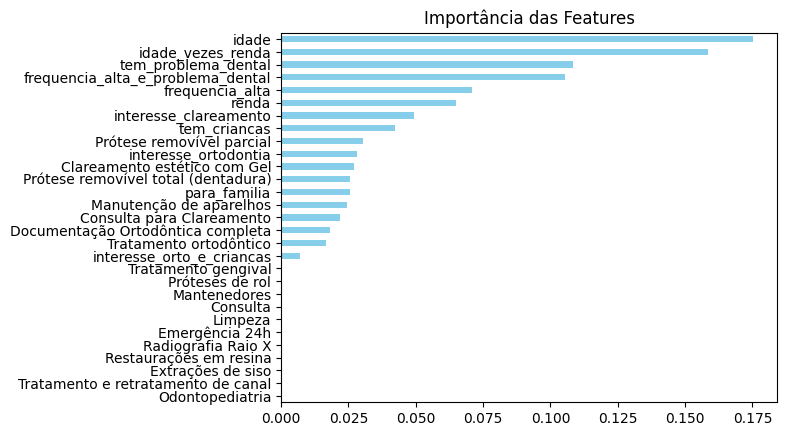

In [33]:
def gerar_dados_sinteticos(n_amostras=200):  # Aumentei para 200 amostras
    dados = []
    for i in range(n_amostras):
        # Simular respostas do usuário (de forma mais realista)
        idade = np.random.randint(18, 70)
        renda = np.random.randint(1, 5)  # 1 a 4 (faixas de renda)
        frequencia_dentista = np.random.randint(1, 6)
        problema_dental = np.random.choice([True, False], p=[0.3, 0.7]) # Menos chance de ter problema
        interesse_ortodontia = np.random.choice([True, False], p=[0.2, 0.8]) # Menos interesse em orto
        interesse_clareamento = np.random.choice([True, False], p=[0.4, 0.6]) # Menos interesse em clareamento
        para_familia = np.random.choice([True, False], p=[0.3, 0.7])
        tem_criancas = para_familia and np.random.choice([True, False], p=[0.4, 0.6]) # Se é para familia, pode ter crianças
        orcamento = np.random.randint(50, 500) # Orçamento aleatório

        respostas = {
            'idade': idade,
            'renda': renda,
            'frequencia_dentista': frequencia_dentista,
            'problema_dental': problema_dental,
            'interesse_ortodontia': interesse_ortodontia,
            'interesse_clareamento': interesse_clareamento,
            'para_familia': para_familia,
            'tem_criancas': tem_criancas,
            'orcamento': orcamento,
            'preocupacoes': "qualidade e preço" # Valor fixo para simplificar
        }

        # Escolher um plano aleatório para simular a avaliação
        plano_escolhido = np.random.choice(df_planos.index)
        plano = df_planos.loc[plano_escolhido].to_dict()

        # Criar as features (AGORA, DEPOIS de escolher o plano)
        features = criar_features(respostas, plano)

        # Simular se o usuário aderiu ou não (com base em algumas regras + aleatoriedade)
        #  (A lógica aqui é apenas para gerar dados com algum padrão.  Na vida real, o modelo aprenderá os padrões dos dados.)
        pontuacao = 0
        if features['frequencia_alta'] == 1:
            pontuacao += 1
        if features['tem_problema_dental'] == 1:
            pontuacao += 2
        if features['interesse_ortodontia'] == 1 and features['Tratamento ortodôntico'] == 1: # Mudança aqui
            pontuacao += 3
        if features['interesse_clareamento'] == 1 and features['Clareamento estético com Gel'] == 1:
            pontuacao += 2
        if features['tem_criancas'] == 1 and plano_escolhido == "Dental Junior":
            pontuacao += 4

        # A probabilidade de aderir aumenta com a pontuação e diminui com o preço
        probabilidade_aderir = min(0.9, pontuacao * 0.1 + (500 - respostas['orcamento']) * 0.001)  # Limitar a 90%

        aderiu = np.random.rand() < probabilidade_aderir
        dados.append((features, aderiu))

    return dados

## Treinamento e Avaliação do Modelo de Machine Learning

Esta seção do código utiliza os dados sintéticos gerados para treinar um modelo de Machine Learning (Random Forest). Inicialmente, os dados são preparados e divididos em conjuntos de treinamento e teste. Em seguida, o modelo é treinado com os dados de treinamento e, por fim, avaliado usando os dados de teste para verificar sua acurácia. Adicionalmente, é realizada uma análise visual da importância de cada característica (feature) para o modelo.

In [ ]:
# Gerar os dados sintéticos
dados = gerar_dados_sinteticos()

# Preparar os dados para o modelo de ML
X = [d[0] for d in dados]
y = [d[1] for d in dados]

# Converter para DataFrame e depois para NumPy array (tratando valores ausentes)
X = pd.DataFrame(X).fillna(0)
#X = X.to_numpy() # Removing this line to keep X as a DataFrame
y = np.array(y, dtype=int)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
modelo = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5) # Ajuste de hiperparâmetros
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia}")


# (Opcional) Visualizar a importância das features
importancia_features = pd.Series(modelo.feature_importances_, index=X_train.columns) # Now X_train has columns
importancia_features_ordenadas = importancia_features.sort_values()
importancia_features_ordenadas.plot(kind='barh', color='skyblue')
plt.title('Importância das Features')
plt.show()

## Análise Exploratória de Dados (EDA)

Realiza uma análise inicial dos dados simulados. Visualiza a distribuição de cada característica (feature) através de histogramas e calcula a matriz de correlação entre as características e a variável alvo ("aderiu" ou não), exibindo-a em um heatmap. O objetivo é identificar padrões, relações e possíveis problemas nos dados.

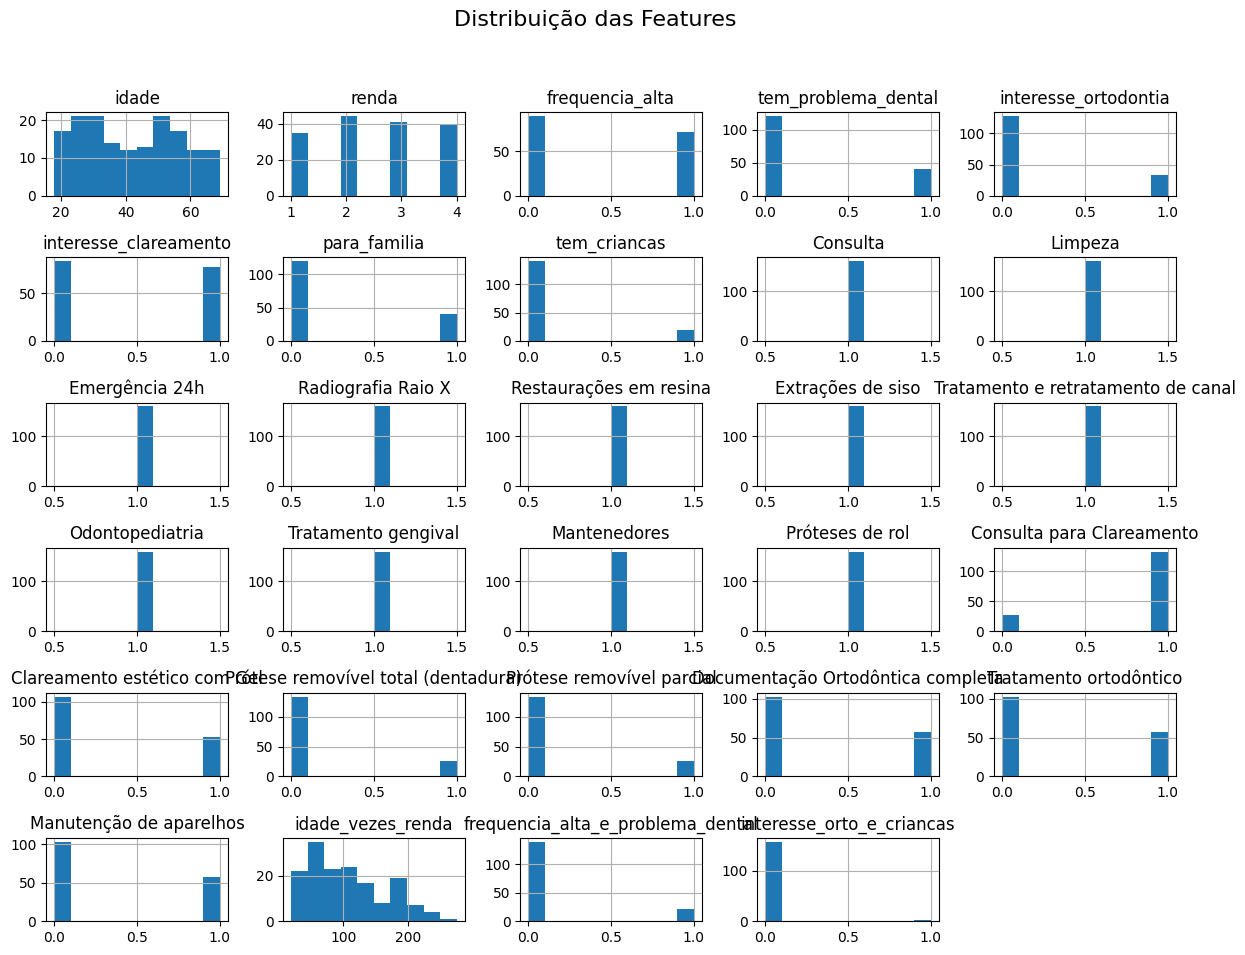

In [35]:
# --------------------- INÍCIO DO CÓDIGO DE EDA ---------------------
# Converter X_train para DataFrame para facilitar a análise
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# 1. Distribuição das features
X_train_df.hist(figsize=(12, 10))
plt.suptitle("Distribuição das Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste para o título
plt.show()

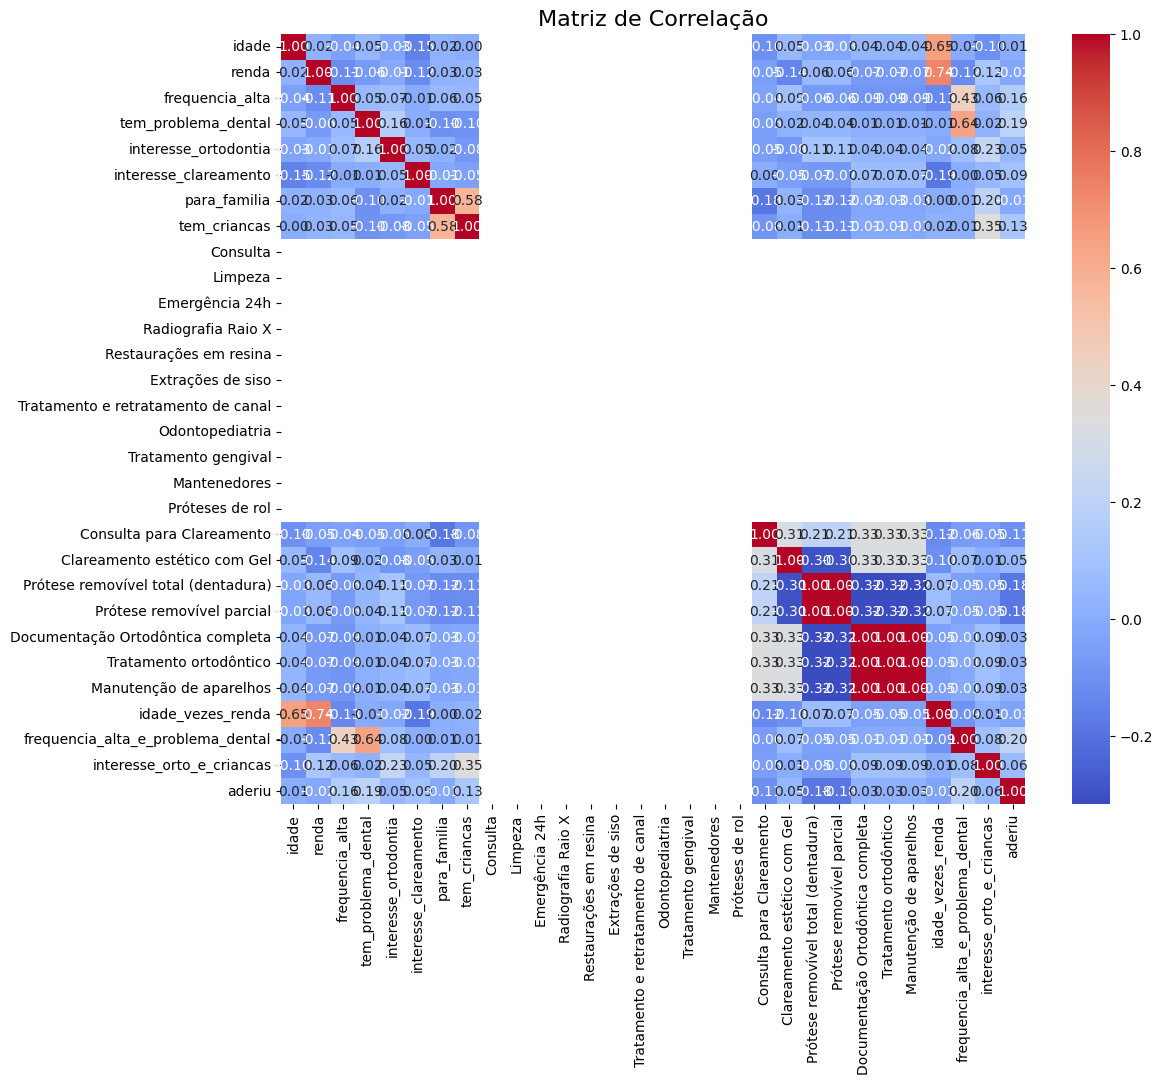

In [36]:
# 2. Correlação com a variável alvo
# Criar um DataFrame com X e y
df_completo = pd.DataFrame(X, columns=X_train.columns)
df_completo['aderiu'] = y

# Calcular a matriz de correlação
matriz_correlacao = df_completo.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação", fontsize=16)
plt.show()
# --------------------- FIM DO CÓDIGO DE EDA ---------------------

 ## Recomendação de Plano e Interação com o Usuário

 Esta seção combina as respostas fornecidas pelo usuário com o modelo de machine learning treinado para recomendar o plano odontológico mais adequado. Primeiro, coleta as respostas do usuário através de perguntas interativas. Em seguida, utiliza a função recomendar_plano para calcular a probabilidade de adesão a cada plano, com base nas respostas do usuário e nas características dos planos, e seleciona o plano com maior probabilidade. Finalmente, apresenta o plano recomendado ao usuário.

In [29]:
def recomendar_plano(df_planos, respostas, modelo, X_train):
    """
    Recomenda um plano odontológico com base nas respostas do usuário e no modelo de ML.
    """

    pontuacoes = {}
    for nome_plano in df_planos.index:
        plano = df_planos.loc[nome_plano].to_dict()
        features = criar_features(respostas, plano)

        # 1. Criar um DataFrame com as colunas corretas e os dados
        features_df = pd.DataFrame([features], columns=X_train.columns)  # Define columns during creation

        # 2. Preencher quaisquer valores ausentes (NaN)
        # Use infer_objects to address the FutureWarning
        features_df = features_df.fillna(0).infer_objects()

        # Prever a probabilidade de adesão usando o modelo
        # Pass the DataFrame directly to predict_proba
        probabilidade = modelo.predict_proba(features_df)[0, 1]
        pontuacoes[nome_plano] = probabilidade

    # Ordenar os planos pela probabilidade de adesão
    planos_ordenados = sorted(pontuacoes.items(), key=lambda x: x[1], reverse=True)
    plano_recomendado = planos_ordenados[0][0]  # Plano com maior probabilidade

    return plano_recomendado

In [30]:
# Coletar as respostas do usuário
respostas_usuario = coletar_respostas_do_usuario()

# Recomendar um plano
plano_recomendado = recomendar_plano(df_planos, respostas_usuario, modelo, X_train)

# Imprimir a recomendação
print(f"\nO plano recomendado para você é: {plano_recomendado}")

Qual a sua idade? 30
Qual a sua faixa de renda mensal?
1. Menos de R$2.000
2. R$2.000 - R$5.000
3. R$5.000 - R$10.000
4. Mais de R$10.000
Digite o número da opção desejada: 3
Com que frequência você costuma ir ao dentista?
1. Nunca
2. Raramente
3. Algumas vezes ao ano
4. Uma vez a cada seis meses
5. Mais de uma vez a cada seis meses
Digite o número da opção desejada: 3
Você está atualmente com algum problema dental (cáries, dor, etc.)? (Sim/Não): Sim
Você tem interesse em tratamentos ortodônticos (aparelhos)? (Sim/Não): Sim
Você tem interesse em clareamento dental? (Sim/Não): Sim
Você está procurando um plano para você mesmo ou para sua família? (Sim/Não): Sim
Há crianças com menos de 15 anos na família? (Sim/Não): Sim

O plano recomendado para você é: Bem Estar Orto White
